In [1]:
# Data Handling
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Preprocessing
from sklearn.model_selection import train_test_split as tts

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Time
import time

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("D:/Amrita_University/S5/Machine Learning/Project/dataset1_ML.csv")

In [3]:
df1.head(10)

label  Accelerometer_x_0  Accelerometer_x_1  Accelerometer_x_2  \
0    step             0.0142            -0.0054            -0.0200   
1    step             0.0192             0.0075             0.0000   
2    step             0.0110             0.0100             0.0123   
3    step             0.0200             0.0176             0.0036   
4    step             0.0039             0.0209            -0.0075   
5    step             0.0218             0.0030            -0.0087   
6    fall             0.0805             0.0705             0.0902   
7  motion             0.0101            -0.0189             0.1431   
8    fall            -0.0125            -0.0123            -0.0078   
9    idle             0.0200             0.0200             0.0200   

   Accelerometer_x_3  Accelerometer_x_4  Accelerometer_x_5  Accelerometer_x_6  \
0            -0.0231            -0.0300            -0.0300            -0.0194   
1             0.0000            -0.0072             0.0058             0.0100   
2             0.0187             0.0200             0.0200             0.0200   
3             0.0080             0.0100             0.0034            -0.0158   
4            -0.0206            -0.0335            -0.0400            -0.0248   
5            -0.0200            -0.0200            -0.0200            -0.0200   
6             0.1126             0.1971             0.0762             0.0417   
7             0.1546             0.1169             0.0122             0.0273   
8            -0.0080            -0.0086            -0.0069            -0.0056   
9             0.0200             0.0200             0.0200             0.0200   

   Accelerometer_x_7  Accelerometer_x_8  Accelerometer_x_9  \
0            -0.0100            -0.0100            -0.0012   
1             0.0195             0.0200             0.0143   
2             0.0174             0.0106             0.0114   
3            -0.0200            -0.0200             0.0000   
4             0.0315             0.0422             0.0525   
5            -0.0288            -0.0200            -0.0112   
6             0.0032             0.0159             0.0071   
7             0.0147            -0.0550            -0.1170   
8             0.0022             0.0158             0.0768   
9             0.0200             0.0200             0.0200   

   Accelerometer_x_10  Accelerometer_x_11  Accelerometer_x_12  \
0             -0.0095             -0.0100              0.0003   
1              0.0100              0.0000             -0.0086   
2              0.0200              0.0259              0.0300   
3              0.0000              0.0064              0.0200   
4              0.0587              0.0454              0.0365   
5              0.0000              0.0026              0.0100   
6              0.2091              0.0247              0.0222   
7             -0.0249             -0.0400              0.0582   
8              0.0478              0.4158              0.3879   
9              0.0200              0.0200              0.0200   

   Accelerometer_x_13  Accelerometer_x_14  Accelerometer_x_15  \
0              0.0100              0.0200              0.0217   
1              0.0068              0.0200              0.0200   
2              0.0300              0.0300              0.0300   
3              0.0168              0.0100              0.0280   
4             -0.0249             -0.0561             -0.0548   
5              0.0174              0.0027             -0.0114   
6              0.3072              0.1302              0.0257   
7              0.0904              0.0636              0.1309   
8              0.0209              0.2185              0.3004   
9              0.0200              0.0200              0.0200   

   Accelerometer_x_16  Accelerometer_x_17  Accelerometer_x_18  \
0              0.0300              0.0091             -0.0040   
1              0.0300              0.0234              0.0033   
2              0.0300          

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Display basic information about the dataset
print("Dataset Info Before Cleaning:")
print(df1.info())

# Identify numeric and non-numeric columns
numeric_columns = df1.select_dtypes(include=['number']).columns
non_numeric_columns = df1.select_dtypes(exclude=['number']).columns

# Handling missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df1[numeric_columns] = numeric_imputer.fit_transform(df1[numeric_columns])

# Handling missing values for non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df1[non_numeric_columns] = non_numeric_imputer.fit_transform(df1[non_numeric_columns])

# Handling duplicates
df1_no_duplicates = df1.drop_duplicates()

# Display information after handling missing values and duplicates
print("\nDataset Info After Cleaning:")
print(df1_no_duplicates.info())

# Handling outliers (optional)
# You can use various techniques to detect and handle outliers based on your dataset
# Here, we use Z-score to identify and remove outliers from numeric columns
z_scores = (df1_no_duplicates[numeric_columns] - df1_no_duplicates[numeric_columns].mean()) / df1_no_duplicates[numeric_columns].std()
df1_no_outliers = df1_no_duplicates[(z_scores.abs() < 3).all(axis=1)]

# Display information after handling outliers
print("\nDataset Info After Handling Outliers:")
print(df1_no_outliers.info())

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1_no_outliers[numeric_columns]), columns=numeric_columns)

# Now df1_scaled is the cleaned and scaled DataFrame that you can use for further analysis or modeling

Dataset Info Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Columns: 961 entries, label to Gyroscope_z_159
dtypes: float64(960), object(1)
memory usage: 14.5+ MB
None

Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1983
Columns: 961 entries, label to Gyroscope_z_159
dtypes: float64(960), object(1)
memory usage: 14.4+ MB
None

Dataset Info After Handling Outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 0 to 1983
Columns: 961 entries, label to Gyroscope_z_159
dtypes: float64(960), object(1)
memory usage: 10.6+ MB
None


In [5]:
df1.isnull().sum()

label                0
Accelerometer_x_0    0
Accelerometer_x_1    0
Accelerometer_x_2    0
Accelerometer_x_3    0
                    ..
Gyroscope_z_155      0
Gyroscope_z_156      0
Gyroscope_z_157      0
Gyroscope_z_158      0
Gyroscope_z_159      0
Length: 961, dtype: int64

In [6]:
# Separate into independent and dependent variables (target).
X = df1.drop("label", axis = 1)
y = df1["label"]

In [7]:
## We divide into training and test set.

# We define the random seed for reproducibility.
SEED = 123
X_train,X_test,y_train,y_test = tts(X,y, 
                                    test_size = 0.2, 
                                    shuffle = True, 
                                    random_state = SEED, 
                                    stratify = y)
print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")

X train: (1587, 960)
X test: (397, 960)


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import time
import numpy as np



SEED = 42  # Set a seed for reproducibility

# Create Extra Trees model
et = ExtraTreesClassifier(bootstrap=True, random_state=SEED)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=SEED)

start = time.time()

# Use cross-validation to tune hyperparameters
param_grid = {}  # Add hyperparameter grid for Extra Trees if needed
grid_search = GridSearchCV(et, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
et_best = grid_search.best_estimator_

# Fit Extra Trees model
et_best.fit(X_train, y_train)
end = time.time()
print(f"* Extra Trees => Total training time = {end - start} seconds")

# Make predictions on training and test sets
y_pred_train_et = et_best.predict(X_train)
y_pred_test_et = et_best.predict(X_test)

# Calculate metrics
accuracy_train_et = accuracy_score(np.array(y_train), y_pred_train_et)
accuracy_test_et = accuracy_score(np.array(y_test), y_pred_test_et)

cf_matrix_train_et = confusion_matrix(np.array(y_train), y_pred_train_et)
cf_matrix_test_et = confusion_matrix(np.array(y_test), y_pred_test_et)

clf_report_train_et = classification_report(np.array(y_train), y_pred_train_et)
clf_report_test_et = classification_report(np.array(y_test), y_pred_test_et)


* Extra Trees => Total training time = 1.6095054149627686 seconds


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import time
import numpy as np



SEED = 42  # Set a seed for reproducibility

# Create Random Forest model
rf = RandomForestClassifier(random_state=SEED)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=SEED)

start = time.time()

# Use cross-validation to tune hyperparameters
param_grid = {}  # Add hyperparameter grid for Random Forest if needed
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_

# Fit Random Forest model
rf_best.fit(X_train, y_train)
end = time.time()
print(f"* Random Forest => Total training time = {end - start} seconds")

# Make predictions on training and test sets
y_pred_train_rf = rf_best.predict(X_train)
y_pred_test_rf = rf_best.predict(X_test)

# Calculate metrics
accuracy_train_rf = accuracy_score(np.array(y_train), y_pred_train_rf)
accuracy_test_rf = accuracy_score(np.array(y_test), y_pred_test_rf)

cf_matrix_train_rf = confusion_matrix(np.array(y_train), y_pred_train_rf)
cf_matrix_test_rf = confusion_matrix(np.array(y_test), y_pred_test_rf)

clf_report_train_rf = classification_report(np.array(y_train), y_pred_train_rf)
clf_report_test_rf = classification_report(np.array(y_test), y_pred_test_rf)


* Random Forest => Total training time = 4.881964445114136 seconds


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import time
import numpy as np



SEED = 42  # Set a seed for reproducibility

# Create SVM model
svm = SVC(random_state=SEED)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=SEED)

start = time.time()

# Use cross-validation to tune hyperparameters
param_grid = {}  # Add hyperparameter grid for SVM if needed
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
svm_best = grid_search.best_estimator_

# Fit SVM model
svm_best.fit(X_train, y_train)
end = time.time()
print(f"* SVM => Total training time = {end - start} seconds")

# Make predictions on training and test sets
y_pred_train_svm = svm_best.predict(X_train)
y_pred_test_svm = svm_best.predict(X_test)

# Calculate metrics
accuracy_train_svm = accuracy_score(np.array(y_train), y_pred_train_svm)
accuracy_test_svm = accuracy_score(np.array(y_test), y_pred_test_svm)

cf_matrix_train_svm = confusion_matrix(np.array(y_train), y_pred_train_svm)
cf_matrix_test_svm = confusion_matrix(np.array(y_test), y_pred_test_svm)

clf_report_train_svm = classification_report(np.array(y_train), y_pred_train_svm)
clf_report_test_svm = classification_report(np.array(y_test), y_pred_test_svm)


* SVM => Total training time = 5.878693103790283 seconds


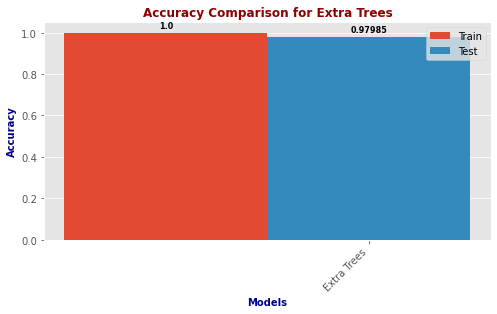

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy(accuracy_train: dict, accuracy_test: dict):
    df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient='index').rename(columns={0: 'Train'})
    df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient='index').rename(columns={0: 'Test'})
    df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index=True, right_index=True)
    df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending=False)

    fig, ax = plt.subplots(figsize=(8, 4))
    n = len(df_accuracy.index)
    x = np.arange(n)
    width = 0.3

    rects1 = ax.bar(x=x - width, height=df_accuracy.iloc[:, 0], width=width)
    rects2 = ax.bar(x=x, height=df_accuracy.iloc[:, 1], width=width)
    ax.set_xticks(x)
    ax.set_xticklabels(df_accuracy.index.to_list(), rotation=45, ha="right")
    ax.set_xlabel('Models', fontsize=10, fontweight='bold', color='darkblue')
    ax.set_ylabel('Accuracy', fontsize=10, fontweight='bold', color='darkblue')
    ax.set_title('Accuracy Comparison for Extra Trees', fontsize=12, fontweight='bold', color='darkred')

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(text=f'{round(height, 5)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center',
                        va='bottom',
                        size=8,
                        weight='bold',
                        color='black')

    autolabel(rects1)
    autolabel(rects2)
    ax.legend(["Train", "Test"])
    plt.show()

# Call the function to plot accuracy metrics for Extra Trees
plot_accuracy({'Extra Trees': accuracy_train_et}, {'Extra Trees': accuracy_test_et})


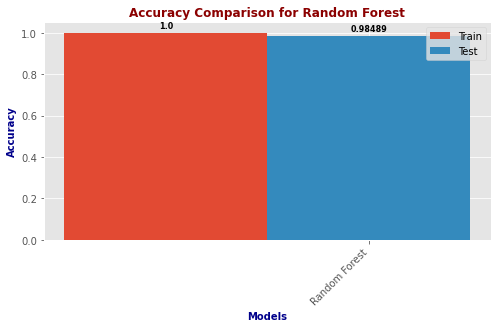

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy(accuracy_train: dict, accuracy_test: dict):
    df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient='index').rename(columns={0: 'Train'})
    df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient='index').rename(columns={0: 'Test'})
    df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index=True, right_index=True)
    df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending=False)

    fig, ax = plt.subplots(figsize=(8, 4))
    n = len(df_accuracy.index)
    x = np.arange(n)
    width = 0.3

    rects1 = ax.bar(x=x - width, height=df_accuracy.iloc[:, 0], width=width)
    rects2 = ax.bar(x=x, height=df_accuracy.iloc[:, 1], width=width)
    ax.set_xticks(x)
    ax.set_xticklabels(df_accuracy.index.to_list(), rotation=45, ha="right")
    ax.set_xlabel('Models', fontsize=10, fontweight='bold', color='darkblue')
    ax.set_ylabel('Accuracy', fontsize=10, fontweight='bold', color='darkblue')
    ax.set_title('Accuracy Comparison for Random Forest', fontsize=12, fontweight='bold', color='darkred')

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(text=f'{round(height, 5)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center',
                        va='bottom',
                        size=8,
                        weight='bold',
                        color='black')

    autolabel(rects1)
    autolabel(rects2)
    ax.legend(["Train", "Test"])
    plt.show()

# Call the function to plot accuracy metrics for Random Forest
plot_accuracy({'Random Forest': accuracy_train_rf}, {'Random Forest': accuracy_test_rf})


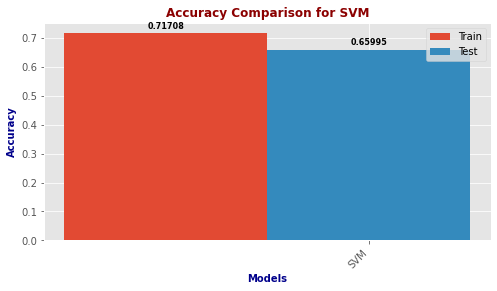

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy(accuracy_train: dict, accuracy_test: dict):
    df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient='index').rename(columns={0: 'Train'})
    df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient='index').rename(columns={0: 'Test'})
    df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index=True, right_index=True)
    df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending=False)

    fig, ax = plt.subplots(figsize=(8, 4))
    n = len(df_accuracy.index)
    x = np.arange(n)
    width = 0.3

    rects1 = ax.bar(x=x - width, height=df_accuracy.iloc[:, 0], width=width)
    rects2 = ax.bar(x=x, height=df_accuracy.iloc[:, 1], width=width)
    ax.set_xticks(x)
    ax.set_xticklabels(df_accuracy.index.to_list(), rotation=45, ha="right")
    ax.set_xlabel('Models', fontsize=10, fontweight='bold', color='darkblue')
    ax.set_ylabel('Accuracy', fontsize=10, fontweight='bold', color='darkblue')
    ax.set_title('Accuracy Comparison for SVM', fontsize=12, fontweight='bold', color='darkred')

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(text=f'{round(height, 5)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center',
                        va='bottom',
                        size=8,
                        weight='bold',
                        color='black')

    autolabel(rects1)
    autolabel(rects2)
    ax.legend(["Train", "Test"])
    plt.show()

# Call the function to plot accuracy metrics for SVM
plot_accuracy({'SVM': accuracy_train_svm}, {'SVM': accuracy_test_svm})


In [15]:
import numpy as np
import time
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Function for enhanced feature engineering
def enhance_features(data):
    # Add more sophisticated feature engineering
    # Example: data['new_feature'] = np.log1p(data['feature1'] * data['feature2'])
    return data

# Load and preprocess your dataset
# Assuming X_train, X_test, y_train, y_test are already defined

# Enhance features
X_train = enhance_features(X_train)
X_test = enhance_features(X_test)

SEED = 42  # Set a seed for reproducibility

# Update ExtraTreesClassifier and RandomForestClassifier hyperparameter grids
et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    # Add more hyperparameters as needed
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    # Add more hyperparameters as needed
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    # Add more hyperparameters as needed
}

et = ExtraTreesClassifier(bootstrap=True, random_state=SEED)
rf = RandomForestClassifier(random_state=SEED)
svm = SVC(random_state=SEED)

MODELS = {'Extra_Trees': et, 'Random_Forest': rf, 'SVM': svm}

# We store the accuracy metric
accuracy_train = {}
accuracy_test = {}

# We store the confusion matrix
cf_matrix_train = {}
cf_matrix_test = {}

# We store the classification report
clf_report_train = {}
clf_report_test = {}

for model_name, model in MODELS.items():
    start = time.time()

    # Use cross-validation to tune hyperparameters
    if model_name == 'Extra_Trees':
        param_grid = et_param_grid
    elif model_name == 'Random_Forest':
        param_grid = rf_param_grid
    else:  # SVM
        param_grid = svm_param_grid

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_

    # Fit model
    model.fit(X_train, y_train)
    end = time.time()
    print(f"* {model_name} => Total training time = {end - start}")

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Accuracy score
    accuracy_train[model_name] = accuracy_score(np.array(y_train), y_pred_train)
    accuracy_test[model_name] = accuracy_score(np.array(y_test), y_pred_test)

    # Confusion Matrix
    cf_matrix_train[model_name] = confusion_matrix(np.array(y_train), y_pred_train)
    cf_matrix_test[model_name] = confusion_matrix(np.array(y_test), y_pred_test)

    # Classification Report
    clf_report_train[model_name] = classification_report(np.array(y_train), y_pred_train)
    clf_report_test[model_name] = classification_report(np.array(y_test), y_pred_test)

# Print the results
print("Final Results:")
print(f"Accuracy on Train Set: {accuracy_train}")
print(f"Accuracy on Test Set: {accuracy_test}")


* Extra_Trees => Total training time = 18.34214496612549
* Random_Forest => Total training time = 49.40757942199707
* SVM => Total training time = 39.059828996658325
Final Results:
Accuracy on Train Set: {'Extra_Trees': 1.0, 'Random_Forest': 1.0, 'SVM': 0.782608695652174}
Accuracy on Test Set: {'Extra_Trees': 0.9874055415617129, 'Random_Forest': 0.9899244332493703, 'SVM': 0.7178841309823678}


In [16]:
MODELS = {'Extra_Trees': et, 'Random_Forest': rf, 'SVM': svm}

# We store the accuracy metric
accuracy_train = {}
accuracy_test = {}

# We store the confusion matrix
cf_matrix_train = {}
cf_matrix_test = {}

# We store the classification report
clf_report_train = {}
clf_report_test = {}

for model_name, model in MODELS.items():
    start = time.time()

    # Use cross-validation to tune hyperparameters
    if model_name == 'Extra_Trees':
        param_grid = et_param_grid
    elif model_name == 'Random_Forest':
        param_grid = rf_param_grid
    else:  # SVM
        param_grid = svm_param_grid

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_

    # Fit model
    model.fit(X_train, y_train)
    end = time.time()
    print(f"* {model_name} => Total training time = {end - start}")

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Accuracy score
    accuracy_train[model_name] = accuracy_score(np.array(y_train), y_pred_train)
    accuracy_test[model_name] = accuracy_score(np.array(y_test), y_pred_test)

    # Confusion Matrix
    cf_matrix_train[model_name] = confusion_matrix(np.array(y_train), y_pred_train)
    cf_matrix_test[model_name] = confusion_matrix(np.array(y_test), y_pred_test)

    # Classification Report
    clf_report_train[model_name] = classification_report(np.array(y_train), y_pred_train)
    clf_report_test[model_name] = classification_report(np.array(y_test), y_pred_test)

    # Store the trained model in a variable with a specific name
    if model_name == 'Extra_Trees':
        model_et = model
    elif model_name == 'Random_Forest':
        model_rf = model
    else:  # SVM
        model_svm = model


* Extra_Trees => Total training time = 19.094775915145874
* Random_Forest => Total training time = 51.016592264175415
* SVM => Total training time = 39.20147705078125


In [17]:
from sklearn.metrics import recall_score, precision_score, f1_score, matthews_corrcoef

# Assuming y_true and y_pred are your true and predicted labels for Extra Trees
# Modify as needed based on your actual variable names
y_true_et = y_test  # Change this based on your actual variable names
y_pred_et = model_et.predict(X_test)  # Change this based on your actual variable names

# Calculate metrics for Extra Trees
recall_et = recall_score(y_true_et, y_pred_et, average='weighted')
precision_et = precision_score(y_true_et, y_pred_et, average='weighted')
f1_et = f1_score(y_true_et, y_pred_et, average='weighted')
mcc_et = matthews_corrcoef(y_true_et, y_pred_et)

# Print the metrics for Extra Trees
print(f"Recall for Extra Trees: {recall_et}")
print(f"Precision for Extra Trees: {precision_et}")
print(f"F1 Score for Extra Trees: {f1_et}")
print(f"MCC for Extra Trees: {mcc_et}")


Recall for Extra Trees: 0.9874055415617129
Precision for Extra Trees: 0.9874767858148155
F1 Score for Extra Trees: 0.9873534460870824
MCC for Extra Trees: 0.983264520016125


In [18]:
y_true_rf = y_test  # Change this based on your actual variable names
y_pred_rf = model_rf.predict(X_test)  # Change this based on your actual variable names

# Calculate metrics for Random Forest
recall_rf = recall_score(y_true_rf, y_pred_rf, average='weighted')
precision_rf = precision_score(y_true_rf, y_pred_rf, average='weighted')
f1_rf = f1_score(y_true_rf, y_pred_rf, average='weighted')
mcc_rf = matthews_corrcoef(y_true_rf, y_pred_rf)

# Print the metrics for Random Forest
print(f"Recall for Random Forest: {recall_rf}")
print(f"Precision for Random Forest: {precision_rf}")
print(f"F1 Score for Random Forest: {f1_rf}")
print(f"MCC for Random Forest: {mcc_rf}")

Recall for Random Forest: 0.9899244332493703
Precision for Random Forest: 0.9899244332493703
F1 Score for Random Forest: 0.9899244332493703
MCC for Random Forest: 0.986564916496049


In [19]:
y_true_svm = y_test  # Change this based on your actual variable names
y_pred_svm = model_svm.predict(X_test)  # Change this based on your actual variable names

# Calculate metrics for SVM
recall_svm = recall_score(y_true_svm, y_pred_svm, average='weighted')
precision_svm = precision_score(y_true_svm, y_pred_svm, average='weighted')
f1_svm = f1_score(y_true_svm, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_true_svm, y_pred_svm)

# Print the metrics for SVM
print(f"Recall for SVM: {recall_svm}")
print(f"Precision for SVM: {precision_svm}")
print(f"F1 Score for SVM: {f1_svm}")
print(f"MCC for SVM: {mcc_svm}")

Recall for SVM: 0.7178841309823678
Precision for SVM: 0.7764749144264375
F1 Score for SVM: 0.7178005508824916
MCC for SVM: 0.6357999478601404


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Extra Trees
et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)

print("\nExtra Trees Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_et))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_et))
print("Classification Report:\n", classification_report(y_test, y_pred_et))

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Random Forest Metrics:
Accuracy: 0.982367758186398
Confusion Matrix:
 [[ 94   0   0   0]
 [  0 105   1   0]
 [  3   2 100   0]
 [  0   0   1  91]]
Classification Report:
               precision    recall  f1-score   support

        fall       0.97      1.00      0.98        94
        idle       0.98      0.99      0.99       106
      motion       0.98      0.95      0.97       105
        step       1.00      0.99      0.99        92

    accuracy                           0.98       397
   macro avg       0.98      0.98      0.98       397
weighted avg       0.98      0.98      0.98       397


Extra Trees Metrics:
Accuracy: 0.982367758186398
Confusion Matrix:
 [[ 94   0   0   0]
 [  0 106   0   0]
 [  2   2  99   2]
 [  0   0   1  91]]
Classification Report:
               precision    recall  f1-score   support

        fall       0.98      1.00      0.99        94
        idle       0.98      1.00      0.99       106
      motion       0.99      0.94      0.97       105
       

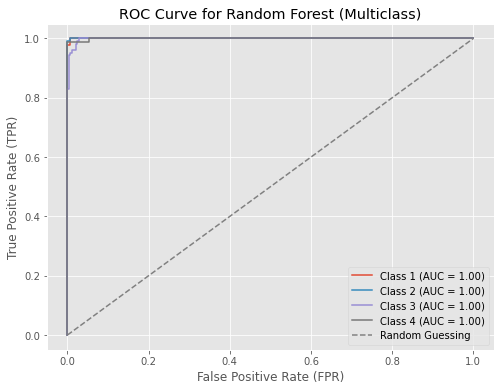

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass classifier using One-vs-Rest strategy
rf_model = OneVsRestClassifier(RandomForestClassifier())
y_score = rf_model.fit(X_train, y_train).predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest (Multiclass)')
plt.legend(loc='lower right')
plt.show()


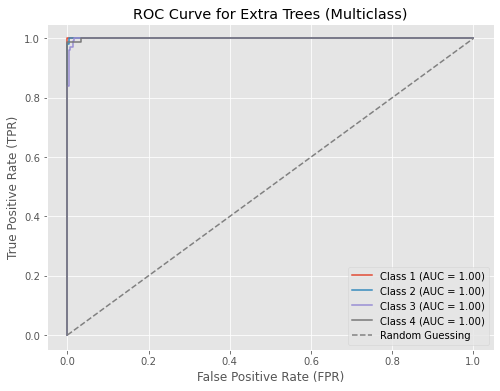

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass classifier using One-vs-Rest strategy
et_model = OneVsRestClassifier(ExtraTreesClassifier())
y_score_et = et_model.fit(X_train, y_train).predict_proba(X_test)

# Binarize the labels
y_test_bin_et = label_binarize(y_test, classes=np.unique(y))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin_et[:, i], y_score_et[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Extra Trees (Multiclass)')
plt.legend(loc='lower right')
plt.show()


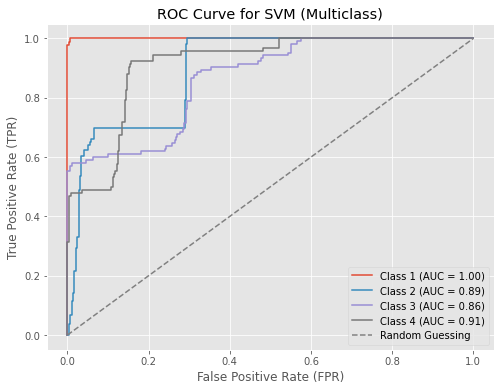

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass classifier using One-vs-Rest strategy
svm_model = OneVsRestClassifier(SVC(probability=True))
y_score_svm = svm_model.fit(X_train, y_train).predict_proba(X_test)

# Binarize the labels
y_test_bin_svm = label_binarize(y_test, classes=np.unique(y))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin_svm[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM (Multiclass)')
plt.legend(loc='lower right')
plt.show()
